The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

Details of Data Frame

Rows : 200 

columns : 4
    
Target : sales
    
problem type: Regression    

# Import liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.0,22.1
1,44.5,39.3,45.0,10.4
2,17.2,45.9,69.0,9.3
3,151.5,41.3,58.0,18.5
4,180.8,10.8,58.0,12.9
...,...,...,...,...
195,38.2,3.7,14.0,7.6
196,94.2,4.9,8.0,9.7
197,177.0,9.3,6.0,12.8
198,283.6,42.0,66.0,25.5


In [18]:
import math

In [24]:
import math
df["newspaper"] = math.floor(df["newspaper"])

TypeError: cannot convert the series to <class 'float'>

In [15]:
df["newspaper"]

0      69.0
1      45.0
2      69.0
3      58.0
4      58.0
       ... 
195    14.0
196     8.0
197     6.0
198    66.0
199     9.0
Name: newspaper, Length: 200, dtype: float64

In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

We have float type of data

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

we have no missing value

<AxesSubplot:>

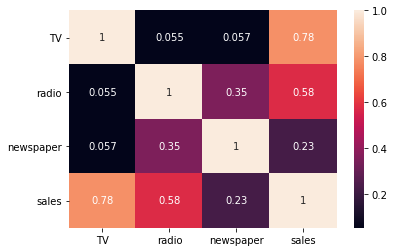

In [29]:
sns.heatmap(df.corr(),annot=True)

sales is highly correlated with TV and least correlation with newspaper.

In [11]:
df.apply(lambda x: len(x.unique()))

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

# Remove outlier

In [12]:
# zscore value measurment
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [13]:
# lets check the presence of outlier

print('shape before removing the outlier:',df.shape)

df_new=df[(zscr<3).all (axis=1)]

print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (200, 4)
shape after removing the outlier: (198, 4)


In [14]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


we have remove 2 outlier rows

TV
-0.08170703953189966


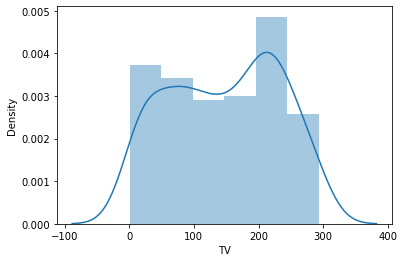

radio
0.1139702341142612


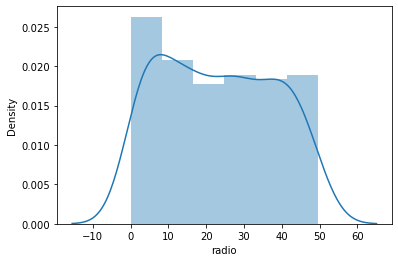

newspaper
0.6451760631790179


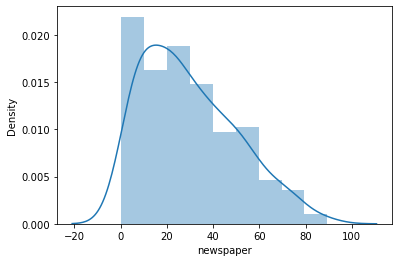

sales
0.4040391835046642


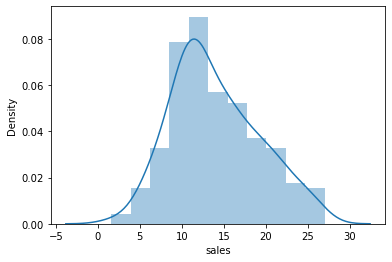

In [26]:
#columns=["TV","radio","newspaper","sales"]
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()


Here we can see that sales and newspaper are similar with normal curve others have littile bit change

In [27]:
for index in df_new.skew().index:
    if df_new.skew().loc[index]>0.5:
        df_new[index]=np.sqrt(df_new[index])

In [28]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

Now we have treated skewness.

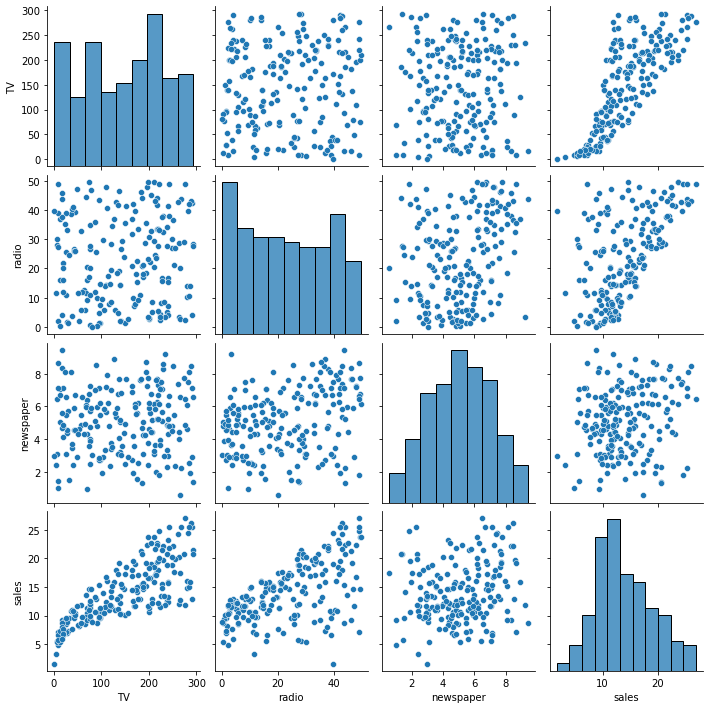

In [30]:
sns.pairplot(df_new)

now datas are ready for the model training

In [33]:
df_x=df_new.drop(columns=["sales"])
y=df_new[["sales"]]

In [34]:
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [40]:
max_r_score=0
for r_state in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  40  is:  0.8932663650180768
r2_score corresponding to random state:  41  is:  0.8664155228386854
r2_score corresponding to random state:  42  is:  0.8973506561453755
r2_score corresponding to random state:  43  is:  0.8753517136188681
r2_score corresponding to random state:  44  is:  0.8129261407044059
r2_score corresponding to random state:  45  is:  0.8752250488622104
r2_score corresponding to random state:  46  is:  0.8747213040260012
r2_score corresponding to random state:  47  is:  0.8922417237310007
r2_score corresponding to random state:  48  is:  0.8680086528232099
r2_score corresponding to random state:  49  is:  0.8350653342955413
r2_score corresponding to random state:  50  is:  0.8423100031908728
r2_score corresponding to random state:  51  is:  0.8957875198770014
r2_score corresponding to random state:  52  is:  0.8925915186724516
r2_score corresponding to random state:  53  is:  0.8523547724792294
r2_score corresponding to random s

In [43]:
cross_val_score(LinearRegression(), x, y, cv=5,scoring="r2").mean()

0.8857406146589945

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=90,test_size=0.20)

In [50]:
def eval(r):
    mod=r
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    scr = cross_val_score(mod,x,y,cv=3,scoring="r2")
    print("r2 score is: ",r2_score(y_test,y_pred))
    print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("cross validation score :",scr.mean())
        

In [51]:
lr=LinearRegression()
eval(lr)

r2 score is:  0.9468304700964035
RMSE is : 1.2660491894834742
cross validation score : 0.8889614061129034


In [62]:
kn=KNeighborsRegressor()
eval(kn)

r2 score is:  0.928209482993107
RMSE is : 1.471135615774426
cross validation score : 0.915762942793629


In [54]:
sv=SVR()
eval(sv)

r2 score is:  0.9215560415646732
RMSE is : 1.537796682714078
cross validation score : 0.88981945622717


so best model is KNeighborsRegressor

In [55]:
parameter={"n_neighbors":np.arange(2,10),
          "weights":["uniform", "distance"] }

In [57]:
gcv=GridSearchCV(kn,parameter,cv=3)

In [58]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [59]:
gcv.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [61]:
final_mod =KNeighborsRegressor(n_neighbors=4,weights='distance')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

93.64799404472099


before it was 91, now it is increase to 93